In [12]:
# library
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib
matplotlib.use("Agg")

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn import preprocessing
import glob
import time
from datetime import timedelta
from PIL import Image

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = True # make grid

In [4]:
df = pd.read_csv('./data/202004-divvy-tripdata.csv',sep=',')

In [5]:
df.sort_values(by = 'started_at', ascending = True, inplace = True) 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
74346,5DB63F4E4EB6A9CF,docked_bike,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,162,Pine Grove Ave & Waveland Ave,232.0,41.9359,-87.6784,41.9493,-87.6463,casual
46139,1FD159E93F7BAFA1,docked_bike,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,72,Wabash Ave & 9th St,321.0,41.8604,-87.6258,41.8708,-87.6257,member
17735,6D93A270684EC452,docked_bike,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,162,Spaulding Ave & Armitage Ave,506.0,41.9359,-87.6784,41.9171,-87.7102,casual
53075,091D47E4F0FC5022,docked_bike,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,173,Clark St & Schiller St,301.0,41.8969,-87.6217,41.9080,-87.6315,member
46138,07F785C9DDA3404C,docked_bike,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,321,Wabash Ave & 9th St,321.0,41.8708,-87.6257,41.8708,-87.6257,member


In [15]:
def snapshot(df,min):
    tem_min = pd.read_csv(df,sep=",")
    tem_min["started_at"] = pd.to_datetime(tem_min["started_at"])    
    tem_min = tem_min.sort_values("started_at", ascending=True)
    start_timestamp = tem_min['started_at'].min()
    end_timestamp = tem_min["started_at"].max()

    interval = timedelta(minutes=min)
    current_timestamp = start_timestamp
    new_datasets = []

    timestamp = []
    gc = []
    edge_list = []
    node_list = []

    while current_timestamp <= end_timestamp:
        # current timestamp plus interval
        next_timestamp = current_timestamp + interval

        # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
        subset = tem_min[(tem_min['started_at'] >= current_timestamp) & (tem_min['started_at'] < next_timestamp)]

        # Add to new dataset
        new_datasets.append(subset)
        timestamp.append(current_timestamp)

        # update timestamp
        current_timestamp = next_timestamp

    # analyze
    for i in range(len(new_datasets)):
        tem_day_n = nx.from_pandas_edgelist(new_datasets[i],
                                            source="start_station_id",
                                            target="end_station_id",
                                            create_using=nx.DiGraph())
        
        edge_list.append(tem_day_n.number_of_edges())
        node_list.append(tem_day_n.number_of_nodes())
        

        current_timestamp += interval
    
    plt.plot(node_list, edge_list, marker="o")
    plt.xlabel("N")
    plt.ylabel("M")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()

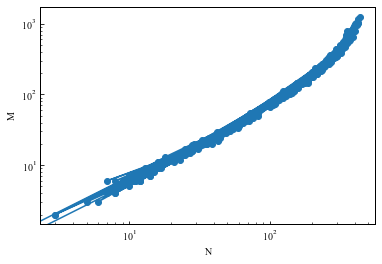

In [18]:
snapshot("./data/202004-divvy-tripdata.csv", 120)